## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.\

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.\

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных
Name — название игры\
Platform — платформа\
Year_of_Release — год выпуска\
Genre — жанр игры\
NA_sales — продажи в Северной Америке (миллионы проданных копий)\
EU_sales — продажи в Европе (миллионы проданных копий)\
JP_sales — продажи в Японии (миллионы проданных копий)\
Other_sales — продажи в других странах (миллионы проданных копий)\
Critic_Score — оценка критиков (максимум 100)\
User_Score — оценка пользователей (максимум 10)\
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.\
Данные за 2016 год могут быть неполными.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
def rewiev(row):
    print('info')
    display(row.info())
    print('----------------------------------------------------')
    print('head')
    display(row.head(10))
    print('----------------------------------------------------')
    print('isna')      
    display(row.isna().sum())
    print('----------------------------------------------------')
    print('isna%')      
    display(row.isna().sum()/len(row))
    print('----------------------------------------------------')
    print('describe')      
    display(row.describe())
    print('----------------------------------------------------')
    return

In [4]:
rewiev(df)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

----------------------------------------------------
head


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


----------------------------------------------------
isna


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

----------------------------------------------------
isna%


Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

----------------------------------------------------
describe


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


----------------------------------------------------


Есть пропуски в колонках, name, year_of_release,genre, critic_score,user_score, rating.\
name, year_of_release,genre скорее всего не были заполнены при формировании таблицы, от них избавимся так какх их менее 5%\
critic_score,user_score, rating  удалить пропуски нельзя так как потеряем много данных, заменим на -1, чтоб было проще обрабатывать\
Значение tbd означает что рейтинг еще не проставлен, так же заменим на -1 чтоб проще обрабатывать

 ## Шаг 2. Подготовьте данные

In [5]:
df.columns = df.columns.str.lower()# приводим все к нижнему регистру

In [6]:
df[df['name'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
df[df['year_of_release'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
df[df['genre'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
df = (df.dropna(subset=['name'])).reset_index(drop=True)
df = (df.dropna(subset=['year_of_release'])).reset_index(drop=True)
df = (df.dropna(subset=['genre'])).reset_index(drop=True)

In [10]:
df.shape

(16444, 11)

Удаляем пропуски кторые занимают менее 5% данных

In [11]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [12]:
df['critic_score'] = df['critic_score'].fillna('-1')

In [13]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
df['user_score'] = df['user_score'].replace('tbd', -1)
df['user_score'] = df['user_score'].fillna(-1)

In [15]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
df['rating'] = df['rating'].replace('K-A', 'E')

Меняем К-А на Е так как это одно и тоже

In [17]:
df['rating'] = df['rating'].fillna('Unknown')

Заменяем пропуски на Unknown

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  object 
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.4+ MB


In [19]:
df['user_score'] = df['user_score'].astype('float64')#Меняем object на float64
df['year_of_release'] = df['year_of_release'].astype('Int64')#Меняем float64 на int64
df['critic_score'] = df['critic_score'].astype('float64')#Меняем object на float64

In [20]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)#Считаем суммарные продажи во всех регионах

Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

## Шаг 3. Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [22]:
df_games_release = df.pivot_table(index='year_of_release', 
                                aggfunc={'total_sales':['count', 'sum']}).reset_index()
df_games_release.columns = ['year_of_release', 'count_games', 'total_sales']

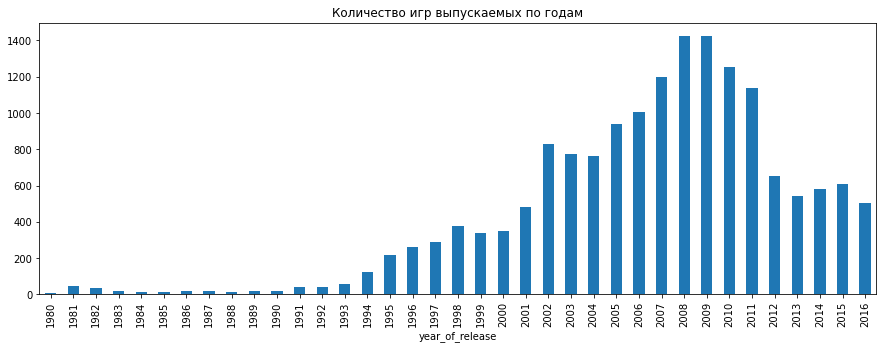

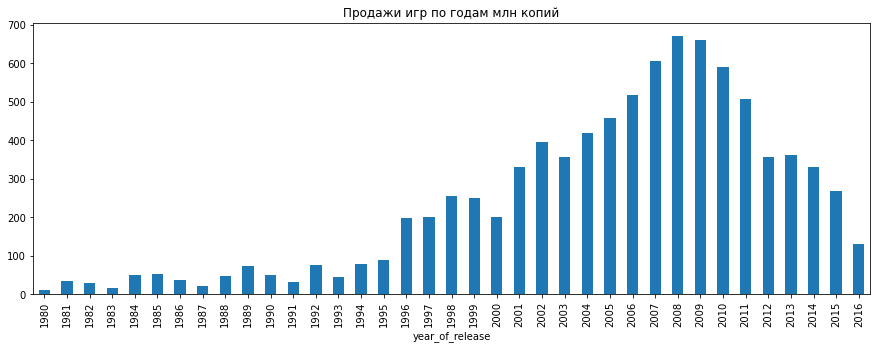

In [23]:
df_games_release.plot(x='year_of_release',y=['count_games'],kind='bar'
                      ,figsize=(15,5),legend=False,title='Количество игр выпускаемых по годам')# График количества игр
df_games_release.plot(x='year_of_release',y=['total_sales'],kind='bar'
                      ,figsize=(15,5),legend=False,title='Продажи игр по годам млн копий')# График продаж
plt.show()

До 1994 года продажи игр не росли, получается что ранее 1994 года данные для анализа нам не интересны.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [24]:
target_year_sales = df[df['year_of_release']>=1994]

In [25]:
target_year_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Unknown,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,Unknown,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,Unknown,0.01


In [26]:
platforms_top = (target_year_sales
         .pivot_table(index=['platform'], aggfunc={'total_sales':'sum'})
         .reset_index()
         .sort_values(by='total_sales', ascending=False)
        )
platforms_top

,platform,total_sales
14,PS2,1233.56
26,X360,961.24
15,PS3,931.34
24,Wii,891.18
3,DS,802.76
13,PS,727.58
16,PS4,314.14
5,GBA,312.88
17,PSP,289.53
1,3DS,257.81


In [27]:
platforms_top = platforms_top[platforms_top['total_sales']>350]
platforms_top
platforms_top_name = list(platforms_top['platform'].unique())
platforms_top_name

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [28]:
df_target = target_year_sales.pivot_table(index=['platform', 'year_of_release'], aggfunc={'total_sales':'sum'}).reset_index()
df_target

,platform,year_of_release,total_sales
0,3DO,1994,0.02
1,3DO,1995,0.08
2,3DS,2011,63.20
3,3DS,2012,51.36
4,3DS,2013,56.57
...,...,...,...
192,XB,2008,0.18
193,XOne,2013,18.96
194,XOne,2014,54.07
195,XOne,2015,60.14


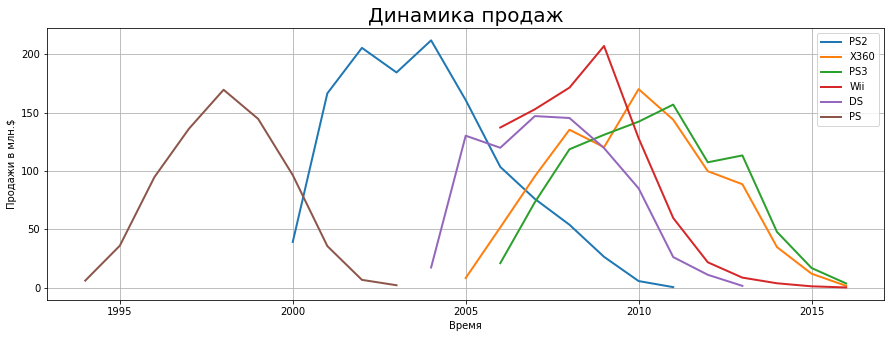

In [29]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

for i in list(platforms_top_name):
    x = df_target[df_target['platform']==i]['year_of_release']
    y = df_target[df_target['platform']==i]['total_sales']

    line = ax.plot(x, y, '-', linewidth=2, label=i)


ax.set_title('Динамика продаж', size=20)
ax.set_xlabel('Время')
ax.set_ylabel('Продажи в млн.$')
ax.legend()
ax.grid(True)


plt.show();

Продажи в среднем в течении 5 лет после появления платформы растут, после 5 лет продажи идут на спад, связано это по всей видимости с тем что выходят более новые платформы.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.\
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Актуальный период получается это крайние 5 лет, но 2016 год не берем в расчет так как данные не полные

In [30]:
target_sales = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2016)]

In [31]:
target_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,Unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01


In [32]:
target = target_sales.pivot_table(index=['platform', 'year_of_release'], aggfunc={'total_sales':'sum'}).reset_index()

In [33]:
target

,platform,year_of_release,total_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,DS,2013,1.54
5,PC,2013,12.38
6,PC,2014,13.28
7,PC,2015,8.52
8,PC,2016,5.25
9,PS3,2013,113.25


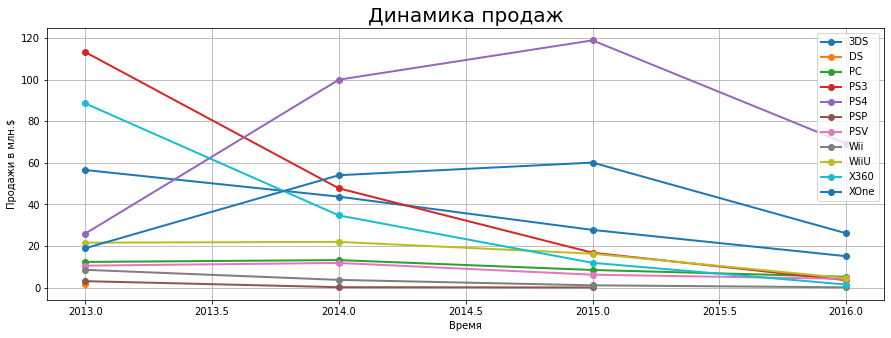

In [34]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

for i in list(target['platform'].unique()):
    x = target[target['platform']==i]['year_of_release']
    y = target[target['platform']==i]['total_sales']

    line = ax.plot(x, y, 'o-', linewidth=2, label=i)


ax.set_title('Динамика продаж', size=20)
ax.set_xlabel('Время')
ax.set_ylabel('Продажи в млн.$')
ax.legend(loc='upper right')
ax.grid(True)


plt.show();

Либерами продаж были PS3, 3DS и Wii.\
Положительную динамику продаж показывают XOne и PS4 Соответственно они имеют потенциал в 2017 году.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [35]:
platform_sales = target_sales.pivot_table(index='name',columns=['platform'] , values='total_sales', aggfunc=np.sum).reset_index()

total_platform_sales = target_sales.pivot_table(index='name', aggfunc={'total_sales':np.sum}).reset_index()

platform_sales = platform_sales.merge(total_platform_sales, on='name')


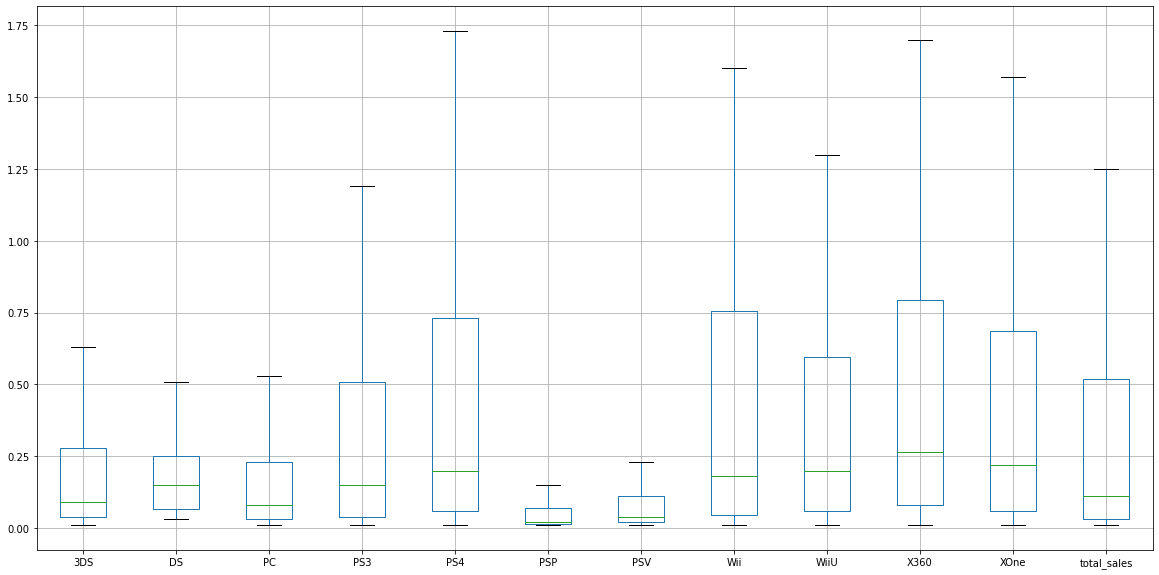

In [36]:
fig = plt.figure(figsize=(20,10))


platform_sales.boxplot(showfliers=False)

plt.show()

In [37]:
platform_sales = df[(df['year_of_release'] >= 2014)]

platform_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,Unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,Unknown,7.98


In [38]:
platforms_order = platform_sales\
                                .groupby(by=['platform'])\
                                .agg({'total_sales': 'sum'})\
                                .sort_values(by=['total_sales'], ascending = False)

platforms_order

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


In [39]:
platforms_order_lst = platforms_order.index.tolist()

platforms_order_lst

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']

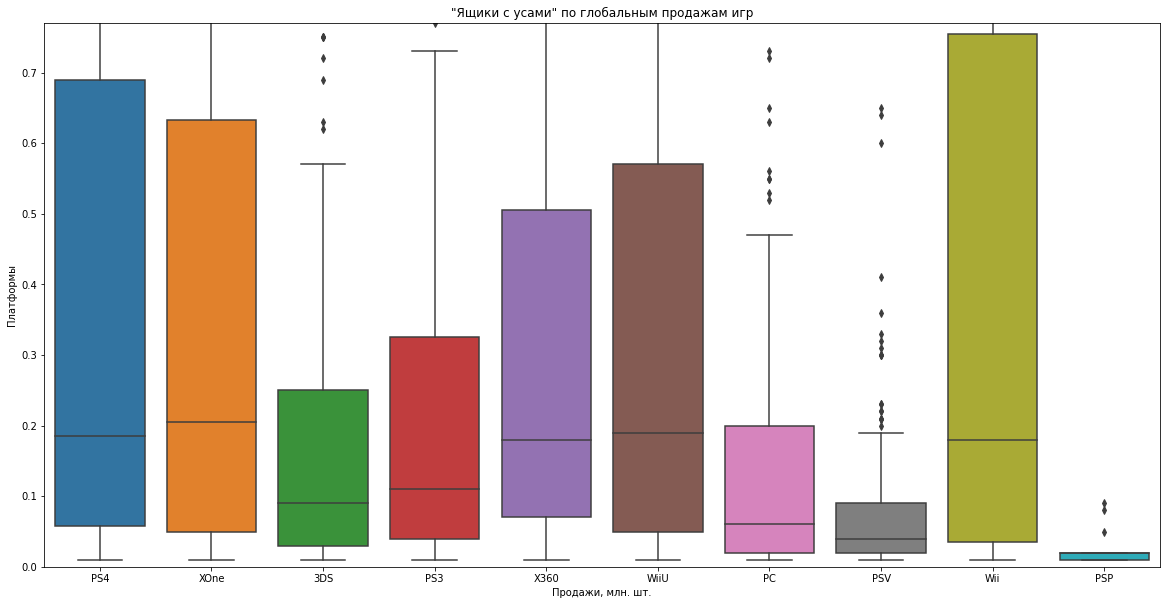

In [40]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=platform_sales, x='platform', y='total_sales', order=platforms_order_lst)

plt.ylim(0, .77)

plt.title('"Ящики с усами" по глобальным продажам игр')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Платформы')

plt.show()

Наибольшие средние продаж наблюдаются на платформах: PS3, PS4, X360, XOne.\
Так же на этих платформах наблюдаются большие выбросы, скорее всего это связатно с эксклюзивными играми для платформ.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [41]:
def scatter(x1, x2, y):
    fig = plt.figure(figsize=(20,10))

    ax1 = fig.add_subplot(211)
    ax1.scatter(x1, y)
    ax1.set_title('Зависимость продаж от оценки критиков', size=20)
    ax1.set_ylabel('Продажи в млн.$', size=16)
    ax1.grid(True)

    ax2 = fig.add_subplot(212)
    ax2.scatter(x2, y)
    ax2.set_title('Зависимость продаж от оценки игроков', size=20)
    ax2.set_ylabel('Продажи в млн.$', size=16)
    ax2.grid(True)

    plt.tight_layout(h_pad = 2)
    plt.show() 

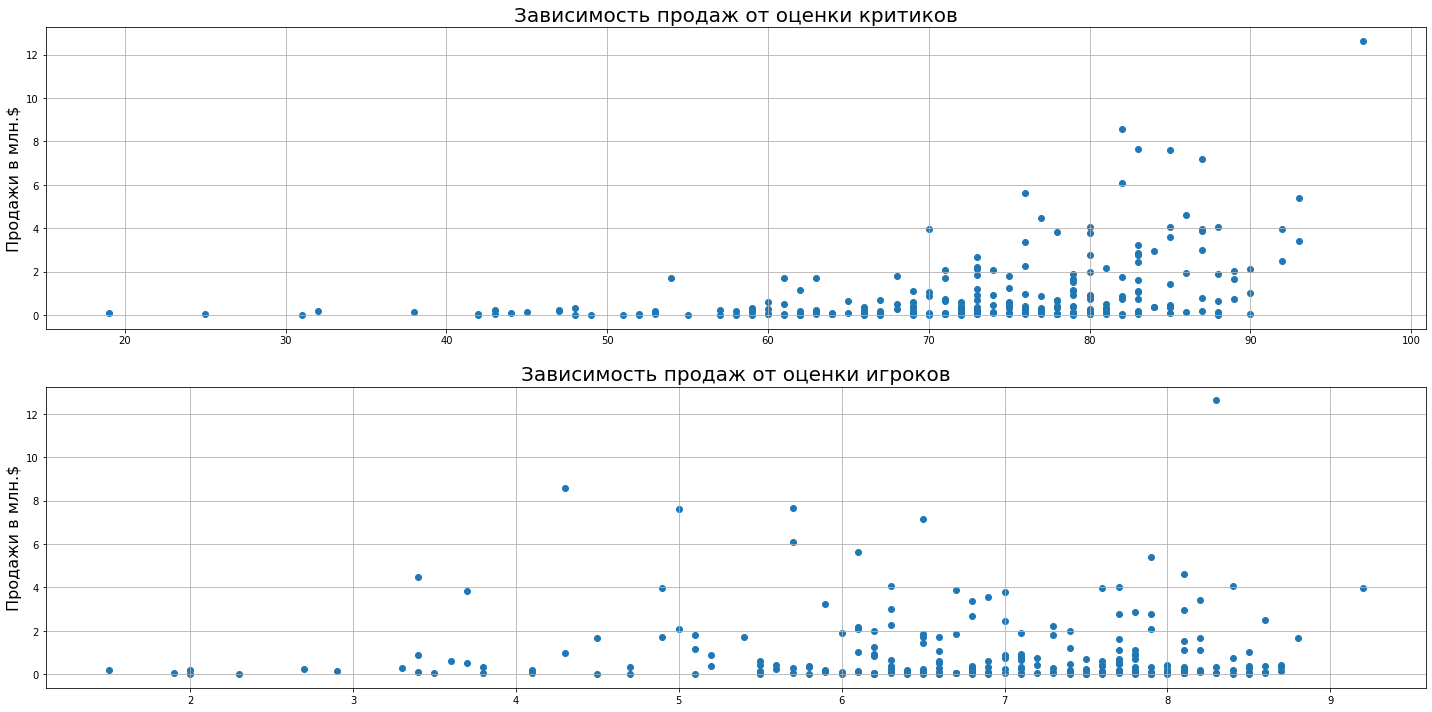

In [42]:
ps4 = target_sales[target_sales['platform'] == 'PS4']
ps4 = ps4[ps4['critic_score']>=0]
ps4 = ps4[ps4['user_score']>=0]
x1 = ps4['critic_score']
x2 = ps4['user_score']
y = ps4['total_sales']

scatter(x1,x2,y)

In [43]:
ps4_table = ps4.pivot_table(index='name', values=['total_sales', 'critic_score', 'user_score'])
ps4_table.corr() 

,critic_score,total_sales,user_score
critic_score,1.000000,0.405895,0.557654
total_sales,0.405895,1.000000,-0.033625
user_score,0.557654,-0.033625,1.000000


Присутствует слабая корреляция с оценками критиков, корреляция с оценками пользователей отсутствует

### Соотнесите выводы с продажами игр на других платформах.

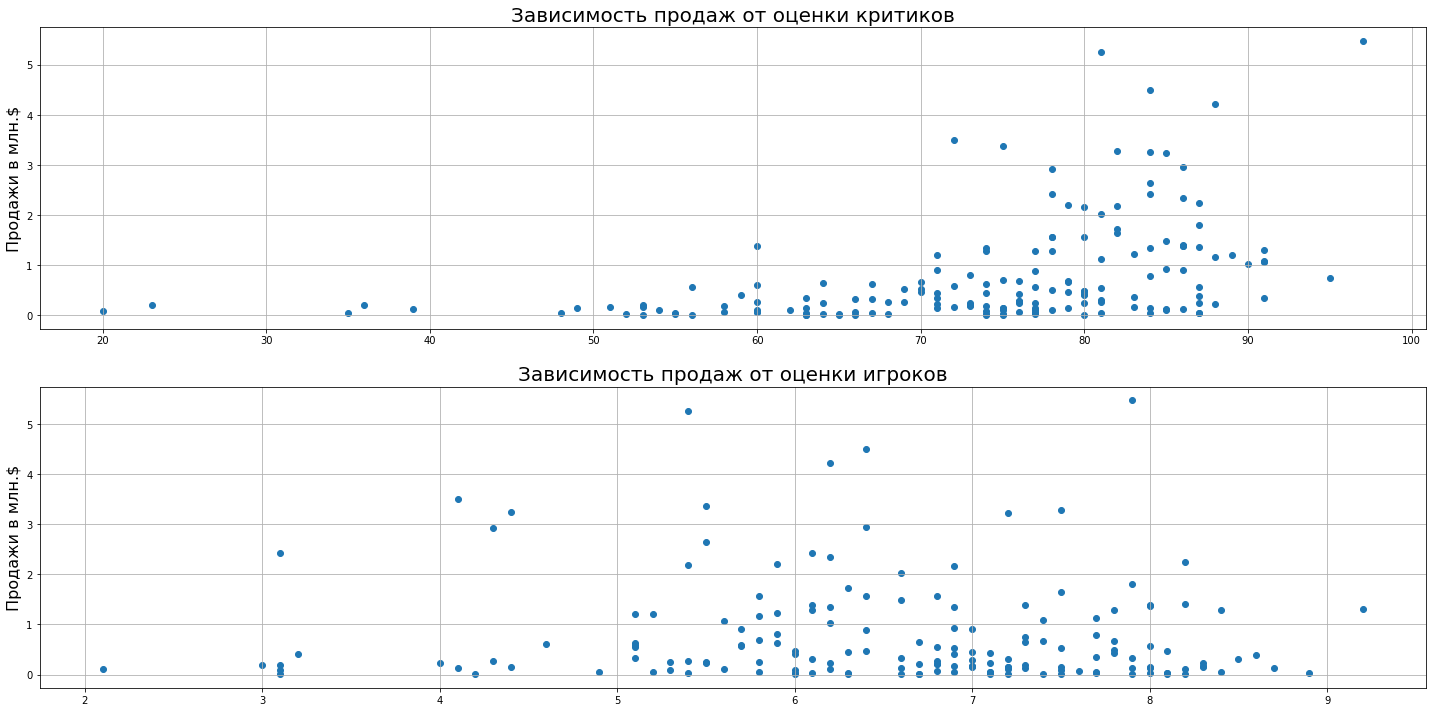

In [44]:
#other_platform = target_sales[target_sales['platform']!='PS4']
XOne = target_sales[target_sales['platform']=='XOne']

XOne = XOne[XOne['critic_score']>=0]
XOne = XOne[XOne['user_score']>=0]

x1 = XOne['critic_score']
x2 = XOne['user_score']
y = XOne['total_sales']

scatter(x1,x2,y)

In [45]:
XOne_table = XOne.pivot_table(index='name', values=['total_sales', 'critic_score', 'user_score'])
XOne_table.corr() 

,critic_score,total_sales,user_score
critic_score,1.000000,0.410422,0.472462
total_sales,0.410422,1.000000,-0.094003
user_score,0.472462,-0.094003,1.000000


На платформе XOne присутствует слабая корреляция с оценками критиков, оценки игроков не влияют на продажи.

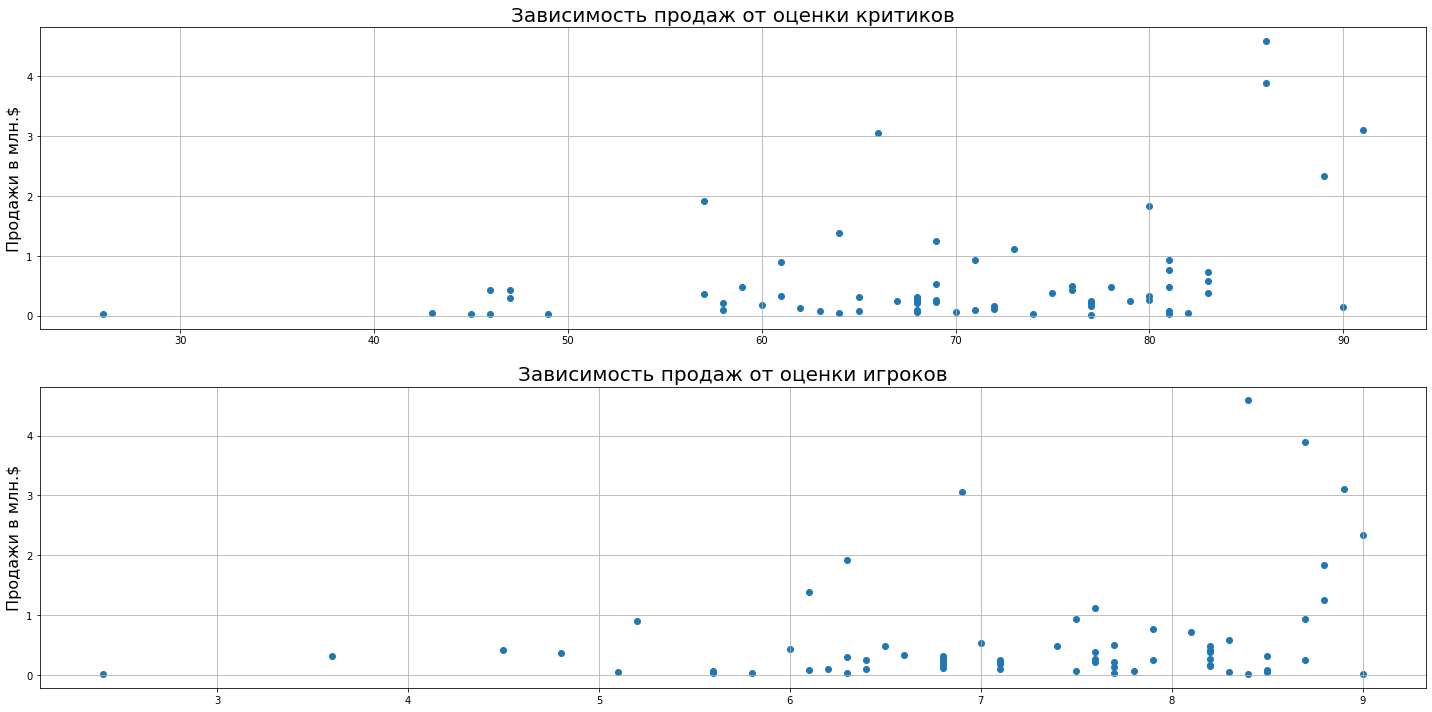

In [46]:
_3DS = target_sales[target_sales['platform']=='3DS']

_3DS = _3DS[_3DS['critic_score']>=0]
_3DS = _3DS[_3DS['user_score']>=0]

x1 = _3DS['critic_score']
x2 = _3DS['user_score']
y = _3DS['total_sales']


scatter(x1,x2,y)

In [47]:
_3DS_table = _3DS.pivot_table(index='name', values=['total_sales', 'critic_score', 'user_score'])
_3DS_table.corr() 

,critic_score,total_sales,user_score
critic_score,1.000000,0.339235,0.769536
total_sales,0.339235,1.000000,0.272990
user_score,0.769536,0.272990,1.000000


На платформе 3DS можно сказать что зависимость продаж от оценок отсутствует

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [48]:
genre_table = (target_sales
               .pivot_table(index='genre', aggfunc={'total_sales':['count', 'sum','median']})
               .reset_index())

genre_table.columns = ['genre', 'count','median' ,'total_sales']
genre_table = genre_table.sort_values(by='total_sales', ascending=False)

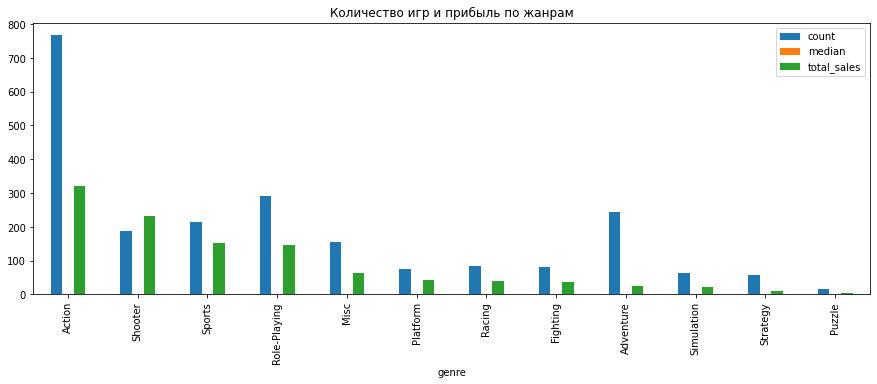

In [49]:
genre_table.plot(x='genre',kind='bar',figsize=(15,5),title='Количество игр и прибыль по жанрам')

plt.show()

In [50]:
mean_table = (target_sales
               .pivot_table(index='genre', aggfunc={'total_sales':['median']})
               .reset_index())
mean_table.columns=['genre', 'median']

mean_table.sort_values(by='median',ascending=False)

,genre,median
8,Shooter,0.450
10,Sports,0.240
4,Platform,0.225
7,Role-Playing,0.125
2,Fighting,0.125
6,Racing,0.120
0,Action,0.110
9,Simulation,0.100
3,Misc,0.100
11,Strategy,0.080


Самые прибыльные по продажам Shooter, Sports, Platform.
Меньше всего приносят прибыли Adventure, Puzzle, Strategy.
Выгоднее всего делать игры жанра Shooter, так как они больше всего приносят прибыли на 1 игру.

## Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):\
Самые популярные платформы (топ-5). Опишите различия в долях продаж.\
Самые популярные жанры (топ-5). Поясните разницу.\
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [51]:
regions_sales = target_sales.pivot_table(index='total_sales', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').sum()
regions_sales

eu_sales    392.23
jp_sales    140.78
na_sales    437.71
dtype: float64

In [52]:
regions = regions_sales.index.tolist()

In [53]:
regions

['eu_sales', 'jp_sales', 'na_sales']

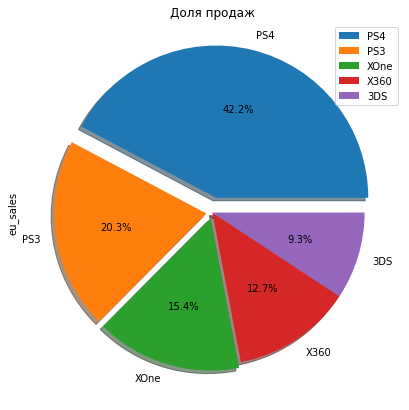

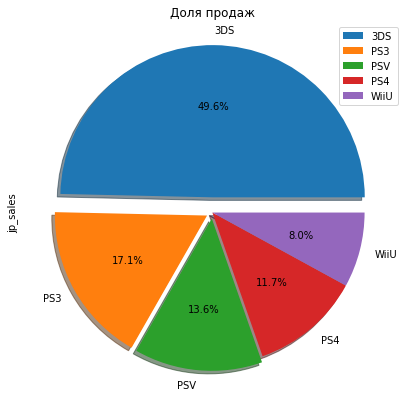

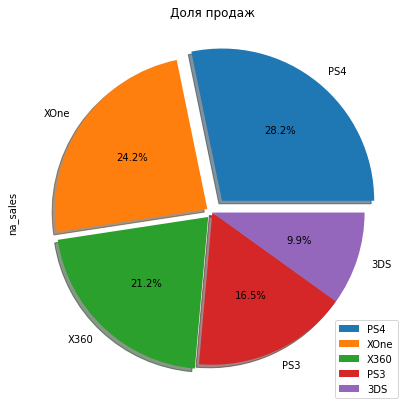

In [54]:
for i in regions:
    (target_sales.pivot_table(index='platform', values=i, aggfunc='sum')
                                .sort_values(by=i, ascending = False)
                                .head(5) 
                                .plot(kind='pie', 
                                      y=i,
                                      explode = (0.1, 0.04, 0.04, 0, 0), 
                                      figsize=(7,7),
                                      shadow=True,
                                      autopct= '%1.1f%%',
                                      title='Доля продаж')
)
plt.show()

Жители разных регионов предпочитают разные платформы
Северная Америка:
1. X360 - 39.3%
2. PS3 - 26.9%
3. Wii - 14.3%
X360 производится в Америке видимо по этому она и самая популярная в регионе.

Япония
1. 3DS - 38.8%
2. PS3 - 23.4%
3. PSP - 17.7%
3DS Производится в Японии по этому и занимает первое место по популярности.

Европа
1. PS3 - 34.5%
2. X360 - 26.4%
3. PS4 - 17.8%
В европе лидирует PS3.



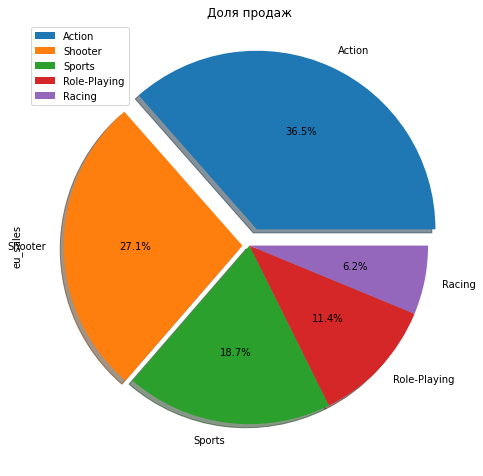

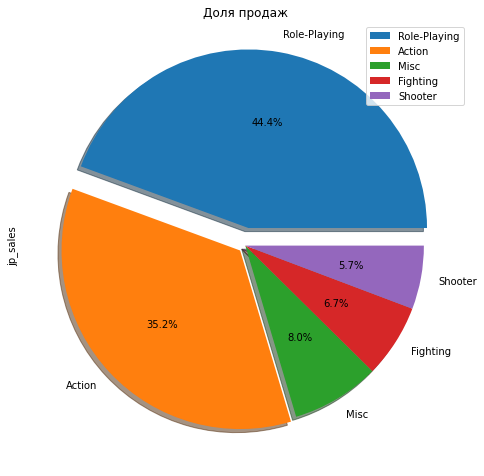

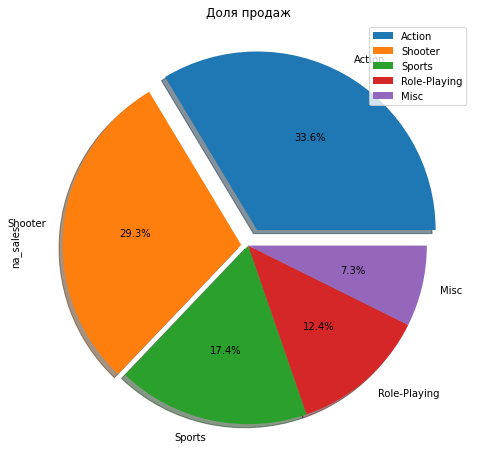

In [55]:
for i in regions:
    (target_sales.pivot_table(index='genre', values=i, aggfunc='sum')
                                .sort_values(by=i, ascending = False)
                                .head(5) 
                                .plot(kind='pie', 
                                      y=i,
                                      explode = (0.1, 0.04, 0, 0, 0), 
                                      figsize=(8,9),
                                      shadow=True,
                                      autopct= '%1.1f%%',
                                      title='Доля продаж')
)
plt.show()

Европейцы и Американцы схожи во квусах жанров игр предпочитают Action и Shooter.
Японцы сильно отличаются и предпочитают жанр Role-Playing

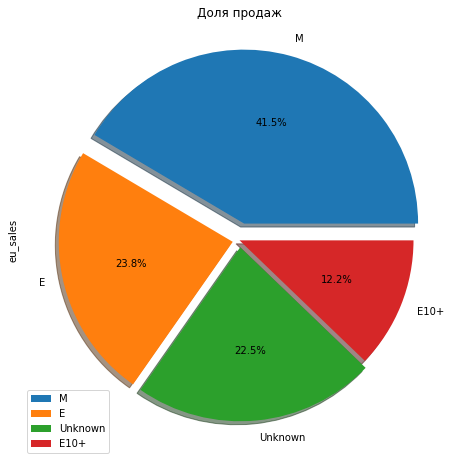

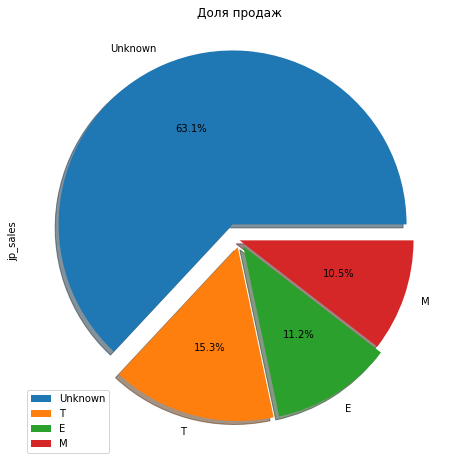

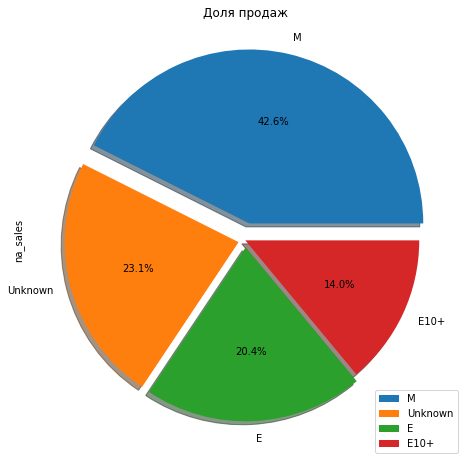

In [56]:
for i in regions:
    (target_sales.pivot_table(index='rating', values=i, aggfunc='sum')
                                .sort_values(by=i, ascending = False)
                                .head(4) 
                                .plot(kind='pie', 
                                      y=i,
                                      explode = (0.1, 0.04, 0.04, 0), 
                                      figsize=(8,8),
                                      shadow=True,
                                      autopct= '%1.1f%%',
                                      title='Доля продаж')
)
plt.show()

Самый популярный жанр в Америке М - Для взрослых\
Самый популярный жанр в Европе М - Для взрослых\
Самый популярный жанр в Японии получился Unknown, по всей видимости рейтинги в Японии свои и нужно больше данных для нанализа чтоб сопоставить их с рейтингами Европы и Америки

### Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;\
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.\
Задайте самостоятельно пороговое значение alpha.\
Поясните:\
Как вы сформулировали нулевую и альтернативную гипотезы;\
Какой критерий применили для проверки гипотез и почему.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [57]:
hipotes_xbox = target_sales.query('platform == "XOne" & user_score != -1') 
hipotes_pc = target_sales.query('platform == "PC" & user_score != -1') 

In [58]:
x = hipotes_xbox['user_score']
var_hipotes_xbox = np.var(x) 
print('Дисперсия для XOne:', var_hipotes_xbox)

Дисперсия для XOne: 1.8965188383045526


In [59]:
x = hipotes_pc['user_score']
var_hipotes_pc = np.var(x) 
print('Дисперсия для PC:', var_hipotes_pc)

Дисперсия для PC: 3.016306347554631


Cоставим нулевую и альтернативную гипотезы.

H₀ - средние рейтинги платформ «Xbox One » и «PC» одинаковые\
H₁ - средние рейтинги платформ «Xbox One » и «PC» не одинаковые

In [60]:
sample1 = hipotes_xbox['user_score']
sample2 = hipotes_pc['user_score']
alpha = 0.05
results = st.ttest_ind(sample1, sample2, equal_var = False)
print('p_значение', (results.pvalue).round(2))
if results.pvalue < alpha:
    print('Отвергаем H₀')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p_значение 0.15
Не получилось отвергнуть нулевую гипотезу


Принимаем гипотезу о равенстве рейтингов

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [61]:
action_user_rating = target_sales.query('genre == "Action" & user_score != -1')
sports_rating = target_sales.query('genre == "Sports" & user_score != -1')

In [62]:
x = action_user_rating['user_score']
var_rating_action = np.var(x)
print('Дисперсия для жанра Action:', var_rating_action)

Дисперсия для жанра Action: 1.7648124186332366


In [63]:
x = sports_rating['user_score']
var_rating_sports = np.var(x) 
print('Дисперсия для жанра Sports:', var_rating_sports)

Дисперсия для жанра Sports: 3.160733984375


Составим нулевую и альтернативную гепотезы:

H₀ - средние рейтинги жанров «Action» и «Sports» одинаковые\
H₁ - средние рейтинги жанров «Action» и «Sports» не одинаковые

In [64]:
sample1 = action_user_rating['user_score']
sample2 = sports_rating['user_score']
alpha = 0.05
results = st.ttest_ind(sample1, sample2, equal_var = False)
print('p_значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем H₀')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p_значение 1.4460039700704315e-20
Отвергаем H₀


Отвергаем нулевую гипотезу о том, что пользовательские рейтинги жанров Action и Sports одинаковые.\
Использовали t-критерий Стьюдента, потому что выборки не зависимы

## Шаг 6. Напишите общий вывод

Мы выявили что с 1994г начался рост количества игр на разных платформах.\
Самые популярные платформы это: PS3, PS4, X360, Xone и 3DS\
Среднее время существование платформы 10 лет, и пик наступает спустя 3-5 лет.\
Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют.\
Самым популярным жанром стал Action.